In [1]:
import sys
assert sys.version_info >= (3, 5)
# Python ≥3.5 is required


In [2]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

In [3]:
# Common imports
import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import urllib.request


In [4]:
# To plot pretty figures
import sklearn
import tensorflow as tf



%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [5]:
data = pd.read_csv("https://raw.githubusercontent.com/BenCoke12/DMMLG3/main/Breast_Cancer.csv")
data.head() #Display the top five rows of the DataFrame by default
data.head(10)# Displays top 10 rows of the dataframe.

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive
5,51,White,Single,T1,N1,IIA,Moderately differentiated,2,Regional,20,Positive,Positive,18,2,89,Alive
6,51,White,Married,T1,N1,IIA,Well differentiated,1,Regional,8,Positive,Positive,11,1,54,Alive
7,40,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,30,Positive,Positive,9,1,14,Dead
8,40,White,Divorced,T4,N3,IIIC,Poorly differentiated,3,Regional,103,Positive,Positive,20,18,70,Alive
9,69,White,Married,T4,N3,IIIC,Well differentiated,1,Distant,32,Positive,Positive,21,12,92,Alive


In [6]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
enc.fit(data[["Race", "Marital Status", "T Stage ", "N Stage", "6th Stage", "differentiate", "Grade", "A Stage", "Estrogen Status", "Progesterone Status", "Status"]])
data[["Race", "Marital Status", "T Stage ", "N Stage", "6th Stage", "differentiate", "Grade", "A Stage", "Estrogen Status", "Progesterone Status", "Status"]] = enc.transform(data[["Race", "Marital Status", "T Stage ", "N Stage", "6th Stage", "differentiate", "Grade", "A Stage", "Estrogen Status", "Progesterone Status", "Status"]])

In [7]:
X=data.iloc[:, -1].values
#X=data

In [8]:
X.shape

(4024,)

In [9]:
Y=data.iloc[:,5]
#Y=data['6th Stage']

In [10]:
X = data.drop('6th Stage', axis = 1)

**Feature Selection**

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, Y, test_size=0.3, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2816, 16), (1208, 16), (2816,), (1208,))

# **Perceptrons**


In [ ]:
from sklearn.linear_model import Perceptron

In [ ]:
per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_clf.fit(X, Y)

Perceptron(random_state=42)

In [ ]:
y_pred = per_clf.predict([[1,2,3,4,5,6,78,9,10,11,12,13,14,15,16]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[Y==0, 0], X[Y==0, 1], "bs", label="IIA")
plt.plot(X[Y==1, 0], X[Y==1, 1], "yo", label="IIIA")


plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Second stage", fontsize=14)
plt.ylabel("Thrid stage", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  "X does not have valid feature names, but"


ValueError: ignored

# Building an Image Classifier using smiley dataset

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
tf.__version__

'2.7.0'

In [ ]:
keras.__version__

'2.7.0'

In [21]:
X = np.load('smiley_X.npy')

In [23]:
Y = np.load('smiley_y.npy')

In [24]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.4, random_state = 42)

In [34]:
X_train.shape

(86, 9, 9, 1)

In [35]:
X_train.dtype

dtype('float64')

In [36]:
class_names = ["1","0"]

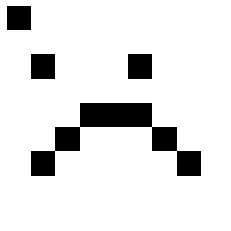

In [45]:
plt.imshow(np.squeeze(X_train[0]), cmap="binary")
plt.axis('off')
plt.show()

In [38]:
Y_train


array([1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0.,
       1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0.,
       1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1.,
       1.])

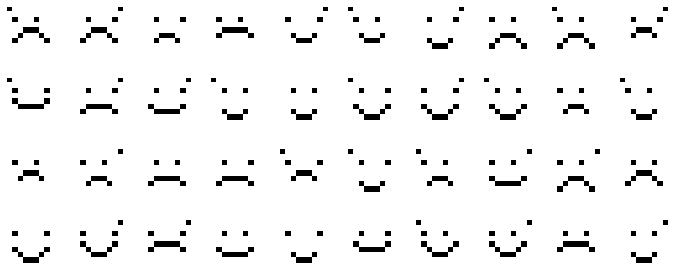

In [47]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(np.squeeze(X_train[index]), cmap="binary", interpolation="nearest")
        plt.axis('off')
plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()

In [49]:
from tensorflow import keras

# Using Relu activation 

In [50]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[9,9,1]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [51]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [52]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[9,9,1]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [53]:
model.layers

In [54]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 81)                0         
                                                                 
 dense (Dense)               (None, 300)               24600     
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 55,710
Trainable params: 55,710
Non-trainable params: 0
_________________________________________________________________


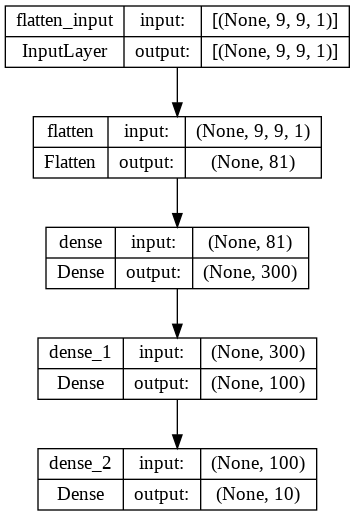

In [55]:
import graphviz
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)


In [56]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [57]:
model.get_layer(hidden1.name) is hidden1

True

In [58]:
weights, biases = hidden1.get_weights()


In [59]:
weights

array([[ 0.04130217, -0.01480626, -0.03692389, ..., -0.04665644,
         0.06509314, -0.11620719],
       [ 0.00803746, -0.05238014, -0.0989579 , ...,  0.01017053,
        -0.04661814, -0.07025951],
       [-0.10439809, -0.11641914,  0.1197992 , ..., -0.07148819,
         0.1201226 , -0.12366715],
       ...,
       [-0.11654184,  0.0326689 ,  0.05009104, ...,  0.09881817,
        -0.09044267, -0.00145391],
       [-0.00577983, -0.10353066,  0.06421167, ...,  0.03093824,
         0.05991793, -0.04134194],
       [-0.00243981, -0.00276937,  0.08891822, ..., -0.11833563,
        -0.0617749 ,  0.00882575]], dtype=float32)

In [60]:
weights.shape


(81, 300)

In [62]:
biases.shape


(300,)

In [63]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [64]:
history = model.fit(X_train, Y_train, epochs=30,
                    validation_data=(X_test, Y_test))

Epoch 1/30
3/3 [==============================] - 1s 120ms/step - loss: 2.0792 - accuracy: 0.2907 - val_loss: 2.0043 - val_accuracy: 0.5690
Epoch 2/30
3/3 [==============================] - 0s 18ms/step - loss: 1.9944 - accuracy: 0.5233 - val_loss: 1.9204 - val_accuracy: 0.6724
Epoch 3/30
3/3 [==============================] - 0s 19ms/step - loss: 1.9094 - accuracy: 0.6977 - val_loss: 1.8367 - val_accuracy: 0.7241
Epoch 4/30
3/3 [==============================] - 0s 17ms/step - loss: 1.8247 - accuracy: 0.7209 - val_loss: 1.7547 - val_accuracy: 0.7241
Epoch 5/30
3/3 [==============================] - 0s 17ms/step - loss: 1.7406 - accuracy: 0.7558 - val_loss: 1.6726 - val_accuracy: 0.7241
Epoch 6/30
3/3 [==============================] - 0s 18ms/step - loss: 1.6578 - accuracy: 0.7674 - val_loss: 1.5916 - val_accuracy: 0.7414
Epoch 7/30
3/3 [==============================] - 0s 19ms/step - loss: 1.5760 - accuracy: 0.7558 - val_loss: 1.5115 - val_accuracy: 0.7414
Epoch 8/30
3/3 [==========

In [65]:
history.params



{'verbose': 1, 'epochs': 30, 'steps': 3}

In [66]:
print(history.epoch)


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [67]:
history.history.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

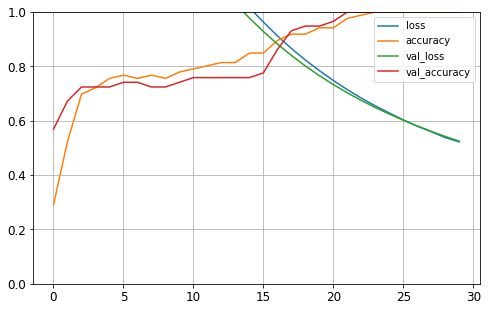

In [68]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [69]:
model.evaluate(X_test, Y_test)

2/2 [==============================] - 0s 12ms/step - loss: 0.5246 - accuracy: 1.0000


[0.5246127843856812, 1.0]

In [70]:
X_new = X_test[10:13]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 95ms/step


array([[0.66, 0.27, 0.01, 0.01, 0.01, 0.01, 0.01, 0.  , 0.02, 0.01],
       [0.22, 0.61, 0.02, 0.02, 0.02, 0.02, 0.03, 0.01, 0.03, 0.02],
       [0.26, 0.61, 0.01, 0.01, 0.02, 0.01, 0.02, 0.01, 0.02, 0.01]],
      dtype=float32)

In [71]:
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

1/1 [==============================] - 0s 38ms/step


array([0, 1, 1])

In [72]:
class_names = ["0","1"]

In [73]:
np.array(class_names)[y_pred]

array(['0', '1', '1'], dtype='<U1')

In [74]:
y_new = Y_test[10:13]
y_new

array([0., 1., 1.])

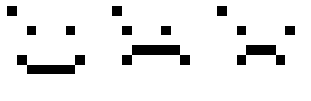

In [76]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 4, index+1)
    plt.imshow(np.squeeze(image), cmap="binary", interpolation="nearest")
    plt.axis('off')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# **Deep MPL**

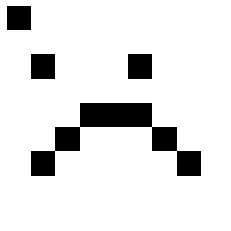

In [79]:
plt.imshow(np.squeeze(X_train[0]), cmap="binary")
plt.axis('off')
plt.show()

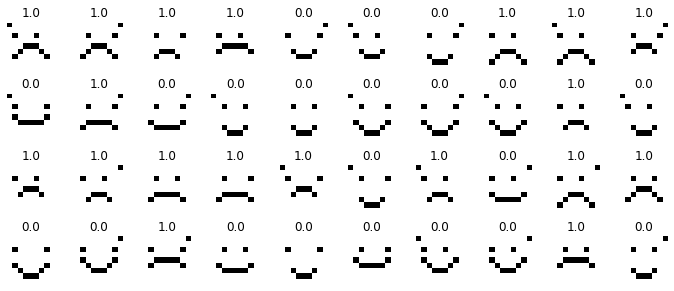

In [81]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(np.squeeze(X_train[index]), cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(Y_train[index], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [82]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.learning_rate))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.learning_rate, self.model.optimizer.learning_rate * self.factor)

In [83]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [84]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[9,9,1]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [85]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])
expon_lr = ExponentialLearningRate(factor=1.005)

In [86]:
history = model.fit(X_train, Y_train, epochs=30,
                    validation_data=(X_test, Y_test),
                    callbacks=[expon_lr])

Epoch 1/30
3/3 [==============================] - 1s 125ms/step - loss: 2.1007 - accuracy: 0.2093 - val_loss: 2.0796 - val_accuracy: 0.2586
Epoch 2/30
1/3 [=========>....................] - ETA: 0s - loss: 2.0819 - accuracy: 0.2500

3/3 [==============================] - 0s 20ms/step - loss: 2.0922 - accuracy: 0.2326 - val_loss: 2.0710 - val_accuracy: 0.2586
Epoch 3/30
3/3 [==============================] - 0s 17ms/step - loss: 2.0834 - accuracy: 0.2558 - val_loss: 2.0622 - val_accuracy: 0.3103
Epoch 4/30
3/3 [==============================] - 0s 16ms/step - loss: 2.0746 - accuracy: 0.2907 - val_loss: 2.0535 - val_accuracy: 0.3448
Epoch 5/30
3/3 [==============================] - 0s 26ms/step - loss: 2.0655 - accuracy: 0.3140 - val_loss: 2.0445 - val_accuracy: 0.3966
Epoch 6/30
3/3 [==============================] - 0s 20ms/step - loss: 2.0563 - accuracy: 0.3488 - val_loss: 2.0353 - val_accuracy: 0.4483
Epoch 7/30
3/3 [==============================] - 0s 18ms/step - loss: 2.0470 - accuracy: 0.3721 - val_loss: 2.0261 - val_accuracy: 0.4655
Epoch 8/30
3/3 [==============================] - 0s 19ms/step - loss: 2.0375 - accuracy: 0.3953 - val_loss: 2.0166 - val_accuracy: 0.5345
Epoch 9/30
3/3 [======================

Text(0, 0.5, 'Loss')

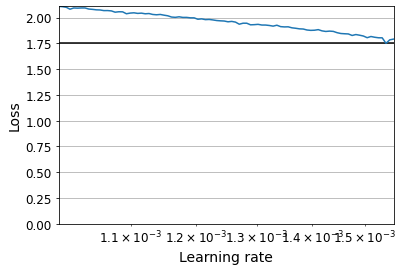

In [87]:
plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))
plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, expon_lr.losses[0]])
plt.grid()
plt.xlabel("Learning rate")
plt.ylabel("Loss")

In [88]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [89]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[9,9,1]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [90]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=3e-1),
              metrics=["accuracy"])

In [91]:
run_index = 1 # increment this at every run
run_logdir = os.path.join(os.curdir, "my_mnist_logs", "run_{:03d}".format(run_index))
run_logdir

'./my_mnist_logs/run_001'

In [92]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_mnist_model.h5", save_best_only=True)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, Y_train, epochs=100,
                    validation_data=(X_test, Y_test),
                    callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb])

Epoch 1/100
3/3 [==============================] - 1s 121ms/step - loss: 1.5005 - accuracy: 0.5814 - val_loss: 0.5347 - val_accuracy: 1.0000
Epoch 2/100
3/3 [==============================] - 0s 22ms/step - loss: 0.8631 - accuracy: 0.6395 - val_loss: 0.5783 - val_accuracy: 0.7069
Epoch 3/100
3/3 [==============================] - 0s 24ms/step - loss: 0.3859 - accuracy: 0.8837 - val_loss: 0.2114 - val_accuracy: 0.9828
Epoch 4/100
3/3 [==============================] - 0s 22ms/step - loss: 0.1336 - accuracy: 0.9884 - val_loss: 0.0701 - val_accuracy: 1.0000
Epoch 5/100
3/3 [==============================] - 0s 26ms/step - loss: 0.0551 - accuracy: 1.0000 - val_loss: 0.0421 - val_accuracy: 1.0000
Epoch 6/100
3/3 [==============================] - 0s 26ms/step - loss: 0.0355 - accuracy: 1.0000 - val_loss: 0.0289 - val_accuracy: 1.0000
Epoch 7/100
3/3 [==============================] - 0s 30ms/step - loss: 0.0243 - accuracy: 1.0000 - val_loss: 0.0218 - val_accuracy: 1.0000
Epoch 8/100
3/3 [==

In [93]:
model = keras.models.load_model("my_mnist_model.h5") # rollback to best model
model.evaluate(X_test, Y_test)

2/2 [==============================] - 0s 7ms/step - loss: 4.9408e-04 - accuracy: 1.0000


[0.0004940755316056311, 1.0]